In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("2011.csv")

In [3]:
df = pd.DataFrame(columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation'])

In [4]:
#df.loc[0]=df1.iloc[0]

In [5]:
df1.shape

(52560, 11)

In [6]:
import tensorflow as tf

In [6]:
#df.loc[0]=df1.iloc[0].tolist()

In [7]:
df1.shape

(52560, 11)

In [8]:
df1.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [9]:
df1.columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation']

In [10]:
df1.head()

,Year,Month,Day,Hour,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed,Radiation
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


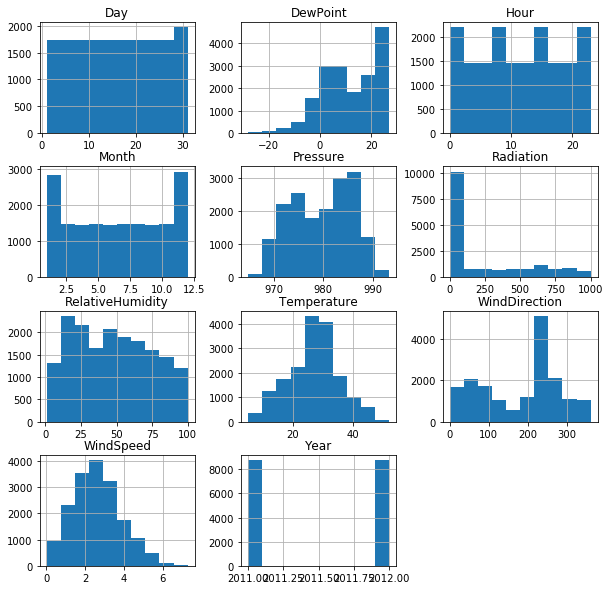

In [10]:
df1.hist(figsize=(10,10))
plt.show()

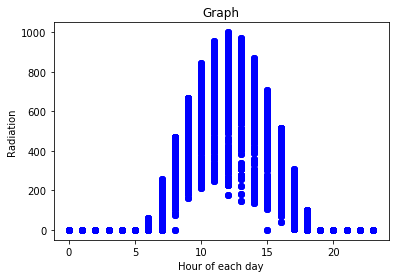

In [40]:
plt.scatter(df1.Hour,df1.Radiation,color='blue')
plt.xlabel("Hour of each day")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [11]:
df1.head()

,Year,Month,Day,Hour,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed,Radiation
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [12]:
df1=df1.drop(['Year'],axis=1)

In [13]:
df1=df1.drop(['WindDirection'],axis=1)

In [14]:
df1=df1.drop(['Month'],axis=1)

In [15]:
df1=df1.drop(['Day'],axis=1)

In [16]:
df1.head()

,Hour,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed,Radiation
0,0,8,13.522659,986.761841,72.295858,3.011042,0
1,1,8,12.835814,986.441406,75.376186,3.091243,0
2,2,8,12.198058,985.736511,78.405198,3.007649,0
3,3,8,11.583500,985.525696,81.042980,2.926715,0
4,4,8,11.029578,985.661926,82.548508,2.915177,0


In [18]:
from sklearn.model_selection import train_test_split
X=df1[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 

In [19]:
from sklearn.neural_network import MLPRegressor

In [20]:
df1.shape

(52560, 7)

In [21]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
Target_predicted= linreg.predict(X_test) 

Score:  0.507532316649


In [23]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission1.csv',index=False)

In [24]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

model_score_error(MLP)

Score:  0.955261296998
